In [128]:
import gzip
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2
from tensorflow.keras.callbacks import History



Reading the dataset from an IDX3-ubyte file and converting it into an numpy Array

In [129]:
train_images = "D:\PrudentBit\samples/train-images-idx3-ubyte.gz"
train_label = "D:\PrudentBit\samples/train-labels-idx1-ubyte.gz"
test_images = "D:\PrudentBit\samples/t10k-images-idx3-ubyte.gz"
test_labels = "D:\PrudentBit\samples/t10k-labels-idx1-ubyte.gz"

def read_mnist(image, labels):
    with gzip.open(labels, 'rb') as labelsFile:
        labels = np.frombuffer(labelsFile.read(), dtype=np.uint8, offset=8)

    with gzip.open(image,'rb') as imagesFile:
        length = len(labels)
        features = np.frombuffer(imagesFile.read(), dtype=np.uint8, offset=16) \
                        .reshape(length, 784) \
                        .reshape(length, 28, 28, 1)
        
    return features, labels

In [130]:
train = {}
test = {}

train['features'], train['labels'] = read_mnist(train_images, train_label)
test['features'], test['labels'] = read_mnist(test_images, test_labels)

In [131]:
print(f"Training Features: {train['features'].shape[0]}")
print(f"Training Labels: {train['labels'].shape[0]}")

print(f"Testing Features: {test['features'].shape[0]}")
print(f"Testing Labels: {test['labels'].shape[0]}")

Training Features: 60000
Training Labels: 60000
Testing Features: 10000
Testing Labels: 10000


In [ ]:
Spliting the data in training and validation

In [132]:
val = {}
train['features'],val['features'],train['labels'],val['labels'] = train_test_split(train['features'],train['labels'], test_size=0.2,random_state=10)


In [133]:
print(f"Validation Features: {val['features'].shape[0]}")
print(f"Validation Labels: {val['labels'].shape[0]}")

Validation Features: 12000
Validation Labels: 12000


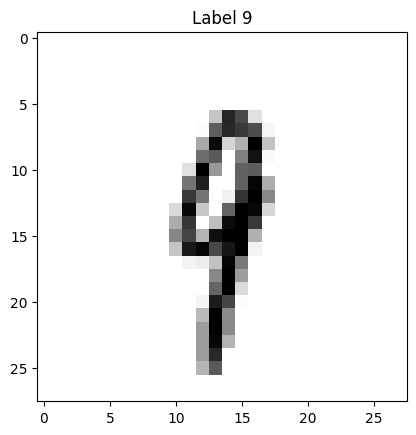

In [134]:
position = 5
image = val['features'][position].squeeze()
plt.title(f"Label {val['labels'][position]} from Validation Dataset")
plt.imshow(image, cmap=plt.cm.gray_r)

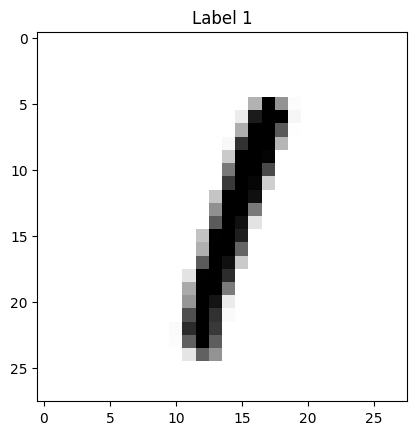

In [135]:
position = 5

image = test['features'][position].squeeze()
plt.title(f"Label {test['labels'][position]} from Testing Dataset")
plt.imshow(image, cmap=plt.cm.gray_r)

Normalizing data

In [136]:
train['features'] = train['features']/255.0
val['features'] = val['features']/255.0
test['features'] = test['features']/255.0

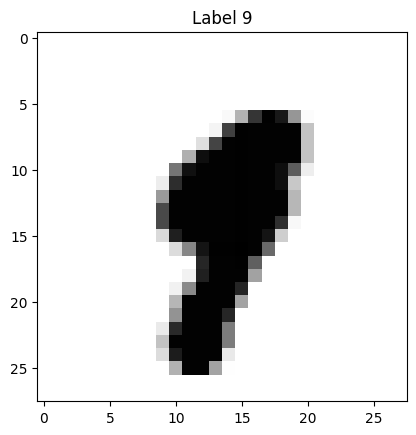

In [137]:
position = 5

image = train['features'][position].squeeze()
plt.title(f"Label {train['labels'][position]} from Training Dataset")
plt.imshow(image, cmap=plt.cm.gray_r)


training the dataset in a neural network which ha 128 layers and output layer has 10 neurons the relu activation function is used in hidden layer, the softmax is used in the output layer as softmax funnction uses probabilty among the 10 neurons for the output

In [138]:

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


history = model.fit(train['features'], train['labels'],validation_data=(val['features'], val['labels']), epochs=10, batch_size=32)

test_loss, test_acc = model.evaluate(test['features'], test['labels'])
print("Test accuracy:", test_acc)
model.save("mnistdigit.keras")

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2836 - accuracy: 0.9184 - val_loss: 0.1608 - val_accuracy: 0.9530
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1278 - accuracy: 0.9627 - val_loss: 0.1200 - val_accuracy: 0.9638
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0874 - accuracy: 0.9740 - val_loss: 0.1055 - val_accuracy: 0.9691
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0645 - accuracy: 0.9803 - val_loss: 0.0922 - val_accuracy: 0.9712
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.0944 - val_accuracy: 0.9708
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0387 - accuracy: 0.9884 - val_loss: 0.0969 - val_accuracy: 0.9717
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0297 - accuracy: 0.9916 - val_loss: 0.0994 - val_accuracy:

In [139]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Plotting the validation and training accuracy

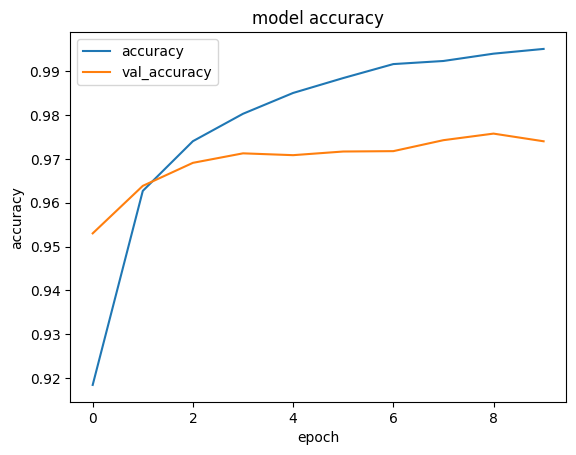

In [140]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(range(len(training_accuracy)), training_accuracy, label='Training Accuracy')
plt.plot(range(len(validation_accuracy)), validation_accuracy, label='Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

Using the model in Test data

In [143]:
pred = []
act = []
for i in range(0,len(test['labels'])):
    sample_image = test['features'][i]
    prediction = model.predict(tf.expand_dims(sample_image, axis=0))
    predicted_digit = tf.argmax(prediction, axis=1)
    pred.append(predicted_digit.numpy()[0])
    act.append(test['labels'][i])
    print(f"Predicted: {predicted_digit.numpy()[0]}         Actual: {test['labels'][i]}")

1/1 [==============================] - 0s 21ms/step
Predicted: 7         Actual: 7
1/1 [==============================] - 0s 20ms/step
Predicted: 2         Actual: 2
1/1 [==============================] - 0s 18ms/step
Predicted: 1         Actual: 1
1/1 [==============================] - 0s 20ms/step
Predicted: 0         Actual: 0
1/1 [==============================] - 0s 19ms/step
Predicted: 4         Actual: 4
1/1 [==============================] - 0s 22ms/step
Predicted: 1         Actual: 1
1/1 [==============================] - 0s 21ms/step
Predicted: 4         Actual: 4
1/1 [==============================] - 0s 20ms/step
Predicted: 9         Actual: 9
1/1 [==============================] - 0s 18ms/step
Predicted: 6         Actual: 5
1/1 [==============================] - 0s 19ms/step
Predicted: 4         Actual: 9
1/1 [==============================] - 0s 19ms/step
Predicted: 0         Actual: 0
1/1 [==============================] - 0s 19ms/step
Predicted: 6         Actual: 6
1/1 

Saving the predicted outcome in a CSV file

In [144]:
df = pd.DataFrame(columns=['Predicted_Digit', 'Actual_Digit'])
df['Predicted_Digit'] = pred
df['Actual_Digit'] = act
df.to_csv('Predictions.csv')

1/1 [==============================] - 0s 22ms/step


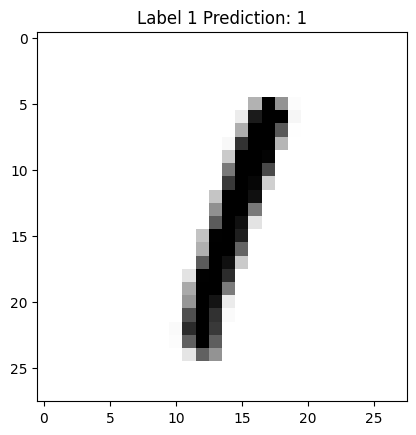

In [148]:
    i=5
    sample_image = test['features'][i]
    prediction = model.predict(tf.expand_dims(sample_image, axis=0))
    predicted_digit = tf.argmax(prediction, axis=1)
    image = test['features'][i].squeeze()
    plt.title(f"Label {test['labels'][i]} Prediction: {predicted_digit.numpy()[0]}")
    plt.imshow(image, cmap=plt.cm.gray_r)
    

1/1 [==============================] - 0s 23ms/step


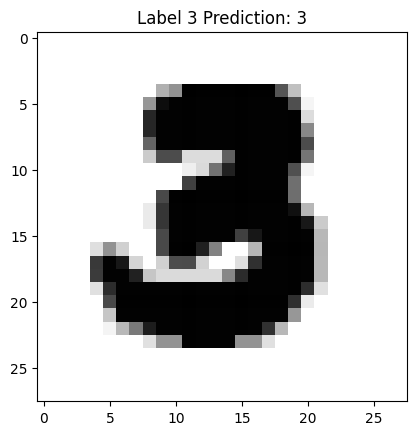

In [149]:
    i=200
    sample_image = test['features'][i]
    prediction = model.predict(tf.expand_dims(sample_image, axis=0))
    predicted_digit = tf.argmax(prediction, axis=1)
    image = test['features'][i].squeeze()
    plt.title(f"Label {test['labels'][i]} Prediction: {predicted_digit.numpy()[0]}")
    plt.imshow(image, cmap=plt.cm.gray_r)